<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-rafaelsangarcia/blob/main/Semana6/Actividad/%20Visualizacion_A01182780.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PORTADA**
## **Actividad Semanal -- 6, visualización**

Rafael Sanchez Garcia A01182780

Ciencia de Datos

María de la Paz Rico Fernández

10/28/2022

#Data Set Information:



This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 



Relevant Papers:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.



Citation Request:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

#1.Descarga los datos y carga el dataset en tu libreta

In [1]:
#Load data from URL
path = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(path, index_col = 0)
df.index.name=None


#2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [3]:
df.shape

(30000, 24)

In [4]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [6]:
df.dtypes

X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

**We have 1 int and 23 floats**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

**We can see that there are missing values from X2 to Y**

In [8]:
df.isna().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

**X1 columns does not have NAs**

#3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [9]:
#lets do a copy of the data set
ndf = df.copy()

##**Clean Categorical**

###**Clean X2 (GENDER)**

First, we should notice that the count for this column is detecting 29999 numbers instead of 30,000. We can infer we have one NaN value in this dataset. Also, As we know, for this variable we should have values of only 1 and 2. As we can see, the table is telling us that we have minimum values of 1 and maximum values of 2, which make us infer that the our 29,999 numbers just have those values.

However, we can double check all this info with the following code.

In [10]:
ndf['X2'].unique().tolist()

[2.0, 1.0, nan]

With this, we are certain that in the Gender Column we have 29,999 values of either 1 or 2 and one NaN.

Since the mean is 1.6 and we can only use 1.0 or 2.0, we cannot use the mean to substitute the NaN value. So we will use mode

In [11]:
mode = ndf['X2'].mode()
mode[0]


2.0

In [12]:
ndf['X2'].replace(np.nan,mode[0] , inplace=True )

**Lets see if we remove all the NAs in X2**

In [13]:
ndf['X2'].isna().any()

False

In [14]:
ndf[['X2']].describe().T

,count,mean,std,min,25%,50%,75%,max
X2,30000.0,1.603767,0.489122,1.0,1.0,2.0,2.0,2.0


###**Clean X3 (EDUCATION)**

In [15]:
ndf['X3'].unique()

array([ 2.,  1.,  3.,  5.,  4.,  6.,  0., nan])

According to our data set information, we have 4 values that should be replaced. 5, 6, 0 and NaN should be adjusted.

Since, in this case we know that 4 = others, then we believe that all values that are misleading (5, 6, 0 and NaN) should be stored as a 4.

In [16]:
ndf['X3'].replace(np.nan, 4.0, inplace=True )
ndf['X3'].replace(5.0, 4.0, inplace=True )
ndf['X3'].replace(6.0, 4.0, inplace=True )
ndf['X3'].replace(0, 4.0, inplace=True )

In [17]:
ndf['X3'].isna().any()

False

In [18]:
ndf[['X3']].describe().T

,count,mean,std,min,25%,50%,75%,max
X3,30000.0,1.842333,0.744643,1.0,1.0,2.0,2.0,4.0


###**Clean X4 (MARITAL STATUS)**

For this column we should only have 3 values 1 = married; 2 = single; 3 = others. Instead, it seems that we have NaN values and 0's

In [19]:
ndf['X4'].unique()

array([ 1.,  2.,  3.,  0., nan])

We will have to replace 0's and NaN. Again, in this case we have a "others" category. Therefore, we will store the misleading data under this category.

In [20]:
ndf['X4'].replace(np.nan, 3.0, inplace=True )
ndf['X4'].replace(0, 3.0, inplace=True )

In [21]:
ndf['X4'].isna().any()

False

In [22]:
ndf[['X4']].describe().T

,count,mean,std,min,25%,50%,75%,max
X4,30000.0,1.5574,0.521518,1.0,1.0,2.0,2.0,3.0


### **Clean X6 - X11 (Payment statos from April to September 2005)**

All these columns should have the following values -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

In [23]:
print(ndf['X6'].unique())
print(ndf['X7'].unique())
print(ndf['X8'].unique())
print(ndf['X9'].unique())
print(ndf['X10'].unique())
print(ndf['X11'].unique())

[ 2. -1.  0. -2.  1.  3.  4.  8.  7.  5.  6. nan]
[ 2.  0. -1. -2.  3.  5.  7.  4.  1.  6. nan  8.]
[-1.  0.  2. -2.  3.  4.  6.  7.  1.  5. nan  8.]
[-1.  0. -2.  2.  3.  4. nan  5.  7.  6.  1.  8.]
[-2.  0. -1.  2. nan  3.  5.  4.  7.  8.  6.]
[-2.  2.  0. -1.  3.  6.  4.  7.  8. nan  5.]


In [24]:
print(ndf['X6'].median())
print(ndf['X7'].median())
print(ndf['X8'].median())
print(ndf['X9'].median())
print(ndf['X10'].median())
print(ndf['X11'].median())

0.0
0.0
0.0
0.0
0.0
0.0


In [25]:
print(ndf['X6'].mode())
print(ndf['X7'].mode())
print(ndf['X8'].mode())
print(ndf['X9'].mode())
print(ndf['X10'].mode())
print(ndf['X11'].mode())

0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64


As we can see, in this columns, we have unwanted data such as 0, -2 and NaN. However, we also see that the median and mode of each of this column is always 0, an undefined value. In this regard, we think that it would be convenient to group all unwanted data (0, -2 and NaN) inside the category 'pay duly', since 0 and -2 probably means that they did not have a delay on the payment. Also, we could define 0 as "pay duly" instead of -1 that way we have a sequence of numbers.

In [26]:
ndf['X6'].replace([np.nan,0,-1,-2], 0.0, inplace=True )
ndf['X7'].replace([np.nan,0,-1,-2], 0.0, inplace=True )
ndf['X8'].replace([np.nan,0,-1,-2], 0.0, inplace=True )
ndf['X9'].replace([np.nan,0,-1,-2], 0.0, inplace=True )
ndf['X10'].replace([np.nan,0,-1,-2], 0.0, inplace=True )
ndf['X11'].replace([np.nan,0,-1,-2], 0.0, inplace=True )

In [27]:
ndf[['X6','X7','X8','X9','X10', 'X11']].isna().any()

X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
dtype: bool

In [28]:
ndf[['X6','X7','X8','X9','X10', 'X11']].describe()

,X6,X7,X8,X9,X10,X11
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.356767,0.320033,0.303800,0.258633,0.221367,0.226500
std,0.760594,0.801727,0.789341,0.760983,0.717575,0.715366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [29]:
print(ndf['X6'].unique())
print(ndf['X7'].unique())
print(ndf['X8'].unique())
print(ndf['X9'].unique())
print(ndf['X10'].unique())
print(ndf['X11'].unique())

[2. 0. 1. 3. 4. 8. 7. 5. 6.]
[2. 0. 3. 5. 7. 4. 1. 6. 8.]
[0. 2. 3. 4. 6. 7. 1. 5. 8.]
[0. 2. 3. 4. 5. 7. 6. 1. 8.]
[0. 2. 3. 5. 4. 7. 8. 6.]
[0. 2. 3. 6. 4. 7. 8. 5.]


##**Clean Non Categorical**

###**Clean X1 (CREDIT)**

In [30]:
ndf['X1'].isna().any()

False

In [31]:
ndf['X1'].isnull().any()

False

In [32]:
ndf[['X1']].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,30000.0,167484.322667,129747.661567,10000.0,50000.0,140000.0,240000.0,1000000.0


We can see that X1 is already cleaned

###**Clean X5 (AGE)**

According to our quick descriptvive analysis, we have five missing values in this column. The rest of the values seem to be correct as the minimum value is 21 (which make sense since it is the legal age in Taiwan) and the max value is 79.

Since our data set is big enough, we will fill our NaN values with the median as it will not show any bias related problems.

In [33]:
ndf['X5'].median()

34.0

In [34]:
ndf['X5'].replace(np.nan, ndf['X5'].median(), inplace=True )

In [35]:
ndf['X5'].isnull().any()

False

In [36]:
ndf[['X5']].describe().T

,count,mean,std,min,25%,50%,75%,max
X5,30000.0,35.483967,9.217276,21.0,28.0,34.0,41.0,79.0


###**Clean X12-X17 (AMOUNT OF BILL STATEMENT FROM APRIL TO SEPTEMBER, 2005)**

First, it is important to understand that a bill statement is a monthly report sent to a credit card holder showing their information regarding the payment due and other information. According to bibliography and our personal experience, a negative balance is possible due to an overpayment. Therefore, we believe that this information is relevant for the analysis.

As you can see in our descriptive table, we have negative values in the minimum value which means that at least one person did an overpayment. As we mentioned, for this exercise we will keep those numbers.

In that regard, the only important information that we have to analyze is the missing values. We have NaN values in all of these columns.

We will evaluate if using the median is a good option. We believe it is based on the same logic that Sour data set is big enough, so it will not show any bias related problems. Also we would like to use it to keep consistency in the type of imputation we are using for the COLUMNS with numerical values.

In [37]:
ndf[['X12','X13','X14','X15','X16','X17']].median()

X12    22387.0
X13    21207.0
X14    20089.0
X15    19052.0
X16    18107.0
X17    17081.0
dtype: float64

In [38]:
ndf[['X12','X13','X14','X15','X16','X17']].isna().any()

X12    True
X13    True
X14    True
X15    True
X16    True
X17    True
dtype: bool

In [39]:
XCol = np.array(['X12','X13','X14','X15','X16','X17'])
XCol
for i in XCol:
  ndf[i].replace(np.nan,ndf[i].median(), inplace = True)


In [40]:
ndf[['X12','X13','X14','X15','X16','X17']].isna().any()

X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
dtype: bool

In [41]:
ndf[['X12','X13','X14','X15','X16','X17']].describe()

,X12,X13,X14,X15,X16,X17
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51226.284467,49180.473967,4.701368e+04,43263.540500,40311.904067,38873.869033
std,73633.787601,71172.349726,6.934810e+04,64331.690439,60795.051774,59552.714581
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3566.750000,2986.750000,2.674750e+03,2332.000000,1769.500000,1258.500000
50%,22387.000000,21207.000000,2.008900e+04,19052.000000,18107.000000,17081.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50177.000000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


As we can see in our table, the values mean values slightly changed compared to our original dataframe. However, the changes are really minimum. For example, in X12 the mean value decreased by approx .019%. This change is really insignificant, therefore we conclude that using the median is a good way to replace the null values.

###**Clean X18-X23 (AMOUNT OF PREVIOUS PAYMENT FROM APRIL TO SEPTEMBER, 2005)**

In [42]:
ndf[['X18','X19','X20','X21','X22','X23']].describe()

,X18,X19,X20,X21,X22,X23
count,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000
mean,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977
std,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000
50%,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


We can see that there are not negative values, that is a good signal. Now we are going to see if we have NaN

In [43]:
ndf[['X18','X19','X20','X21','X22','X23']].isnull().any()

X18    True
X19    True
X20    True
X21    True
X22    True
X23    True
dtype: bool

We have NaN in all the columns.<br>
To solve this issue we will assume that the clients actually paid their exact amount stated in their bill statement from the previous month. In that regard, the strategic will be to copy the monthly balance of the bill statement of the previous month, as an example: <br>

**The balance of August will be the payment in September,**<br>
**The balance of July will be the payment in August, etc**<br>
This will just apply to **X18-X22**

In [44]:
ndf.X18.fillna(ndf.X13, inplace=True)
ndf.X19.fillna(ndf.X14, inplace=True)
ndf.X20.fillna(ndf.X15, inplace=True)
ndf.X21.fillna(ndf.X16, inplace=True)
ndf.X22.fillna(ndf.X17, inplace=True)

In [45]:
ndf[['X18','X19','X20','X21','X22','X23']].isnull().any()

X18    False
X19    False
X20    False
X21    False
X22    False
X23     True
dtype: bool

As we can see above we dont have more NaN from X18 to X22.
Now lets work on X23. As we can see below there are just 5 rows that has NaN values. We are going to delete the entire rows.

In [46]:
ndf[ndf['X23'].isnull()]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
247,250000,2.0,2.0,1.0,75.0,0.0,0.0,0.0,0.0,0.0,...,1010.0,5572.0,794.0,1631.0,1536.0,1010.0,5572.0,794.0,NaN,0.0
248,100000,2.0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,...,30337.0,30997.0,32904.0,1788.0,1799.0,1100.0,1150.0,2423.0,NaN,0.0
6233,60000,2.0,2.0,2.0,29.0,2.0,2.0,2.0,0.0,0.0,...,19052.0,18107.0,17081.0,42117.0,20089.0,19052.0,18107.0,17081.0,NaN,NaN
29825,40000,1.0,1.0,1.0,47.0,2.0,2.0,2.0,2.0,2.0,...,19052.0,18107.0,17081.0,21207.0,20089.0,19052.0,18107.0,17081.0,NaN,NaN
29826,50000,1.0,2.0,1.0,41.0,0.0,0.0,0.0,0.0,0.0,...,19052.0,18107.0,17081.0,21207.0,20089.0,19052.0,18107.0,17081.0,NaN,NaN


In [47]:
#Calculate how much % represent to delete 5 rows
100*(1 - ndf.shape[0]/30000)
#dataframe9.info()

0.0

5 Rows it is just the 0.0166 % of the total database. You we are going to keep this strategic

In [48]:
ndf[['X23']].describe() # we run thsi to evaluate how much it affected our central tendencies after our deletion.

,X23
count,29995.000000
mean,5216.259977
std,17778.848359
min,0.000000
25%,118.000000
50%,1500.000000
75%,4000.000000
max,528666.000000


In [49]:
ndf.dropna(inplace = True)
ndf[['X23']].describe()

,X23
count,29995.000000
mean,5216.259977
std,17778.848359
min,0.000000
25%,118.000000
50%,1500.000000
75%,4000.000000
max,528666.000000


There was no change in the measurements of central tendency, it makes sense since NaN should not be consider when calculating this parameters.

In [50]:
ndf.isnull().any()

X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

#4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

#5. Realiza el conteo de las variables categóricas

In [51]:
CategoricalColumns = ndf[['X2','X3','X4','X6','X7','X8','X9','X10', 'X11',]]
CategoricalColumns.head()

,X2,X3,X4,X6,X7,X8,X9,X10,X11
1,2.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0
2,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0
3,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#6. Escala los datos, si consideras necesario

In [52]:
df_num = ndf.drop(CategoricalColumns, axis = 1)
df_Y = ndf['Y']
df_num.drop('Y', axis= 1, inplace = True)
df_num.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Normalize the data before moving on to PCA since we don't want the PCA to have some kind of bias.

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_num)

scaled_df_num= pd.DataFrame (scaled, columns=df_num.columns)
scaled_df_num.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.005241,0.000000,0.000000
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.006843,0.000000,0.003783
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.006843,0.002345,0.009458
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.007003,0.002506,0.001892
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.019658,0.001615,0.001284


#7. Reduce las dimensiones con PCA, si consideras necesario.
* Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
* Indica la importancia de las variables en cada componente

In [54]:
from sklearn.decomposition import PCA

pcs = PCA()
pcs_columns= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14']
pcs_t = pcs.fit_transform(scaled_df_num)
pca_df=pd.DataFrame(pcs_t, columns=pcs_columns)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-0.262126,-0.026826,0.028143,-0.001057,0.000751,-0.000307,-0.000109,-0.000632,0.000694,-0.000037,0.000402,0.000399,0.000345,0.000618
1,-0.188326,0.006667,-0.041251,-0.005531,-0.003541,0.002140,-0.002320,-0.003183,-0.000202,-0.000140,-0.000292,0.000744,-0.000279,-0.000090
2,-0.076778,-0.064545,0.016637,-0.001541,0.004301,0.003343,-0.000173,-0.006529,0.003287,-0.000449,0.004961,-0.005172,-0.001219,-0.000418
3,-0.036630,-0.085235,0.081404,-0.005237,0.006529,-0.004503,0.002191,0.000428,-0.002555,0.001195,0.002454,0.005209,0.000922,-0.003399
4,0.231464,-0.306664,0.088169,0.012506,-0.016865,0.012706,0.003337,0.007416,0.003605,0.021082,0.006428,0.005085,-0.001481,0.001027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,0.128237,0.094423,0.071959,-0.058849,0.094887,-0.053504,0.013437,0.038277,0.001835,0.038815,-0.016759,0.021388,0.001403,-0.018017
29991,0.067272,-0.139528,-0.029758,-0.006356,-0.008636,0.002315,-0.005686,0.003563,0.006374,0.000308,-0.001632,0.000985,0.001959,-0.000402
29992,-0.064110,-0.129992,0.059827,0.015989,-0.016928,0.014737,-0.002722,0.003623,0.018352,-0.005279,-0.000415,0.004131,0.000903,-0.001469
29993,0.041315,-0.095424,0.068779,0.107969,0.015866,-0.051582,-0.021529,0.087342,-0.055130,-0.020616,-0.017007,-0.012809,-0.007900,-0.009933


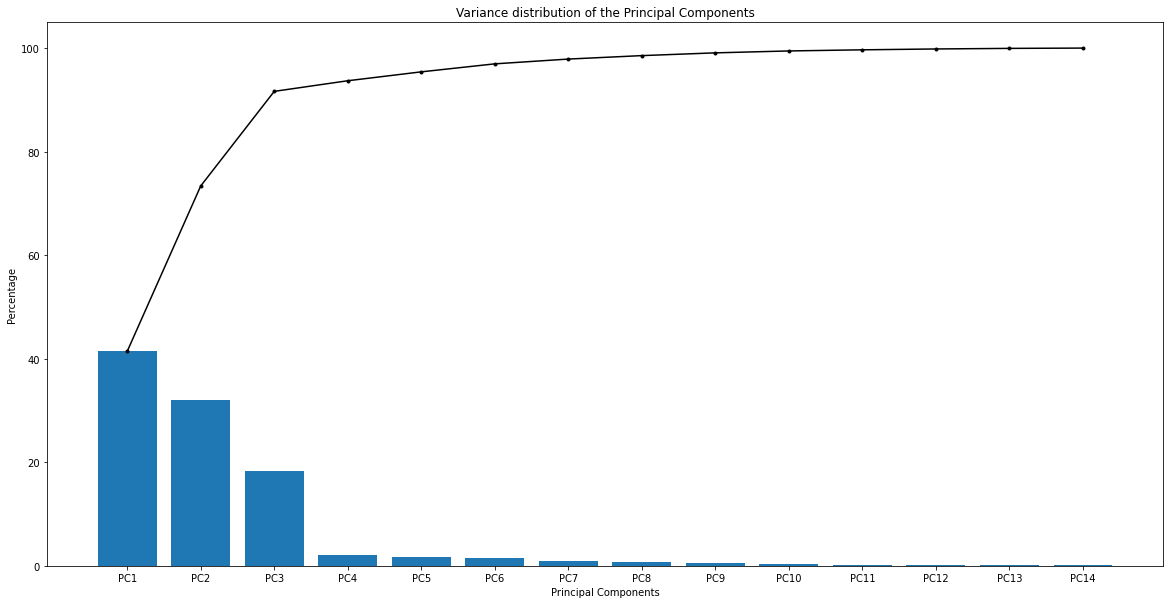

In [55]:
Explained_var=  np.round(pcs.explained_variance_ratio_,4)*100
Acumulated_var= np.cumsum(pcs.explained_variance_ratio_)*100

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(pcs_columns,Explained_var)
plt.plot(pcs_columns,Acumulated_var, color='black', marker='.')

plt.xlabel("Principal Components")
plt.ylabel("Percentage")
plt.title("Variance distribution of the Principal Components")
plt.show()

With this graph we can see that approximately 73% of our data is acumulated in the first 2 components.

However, let's doulbe check this information with actual numbers.

In [56]:
df_pca_variance= pd.DataFrame()
df_pca_variance['Explained_var']=Explained_var
df_pca_variance['Acumulated_var']=Acumulated_var
df_pca_variance.index=pcs_columns
df_pca_variance

,Explained_var,Acumulated_var
PC1,41.42,41.422397
PC2,31.95,73.370464
PC3,18.27,91.642499
PC4,2.05,93.690758
PC5,1.72,95.411107
PC6,1.54,96.954521
PC7,0.92,97.878636
PC8,0.67,98.545871
PC9,0.53,99.078571
PC10,0.37,99.447354


##1. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

Select 2 Components. Because them represent the 73% of variance

In [57]:
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(scaled_df_num)


##2. Indica la importancia de las variables en cada componente

In [58]:
pca.explained_variance_ratio_

array([0.41422397, 0.31948067])

Explained variance

PC1	41.42%	
PC2	31.95%	

In [59]:
np.cov(X_new.T)

array([[ 2.73622655e-02, -8.73550156e-19],
       [-8.73550156e-19,  2.11038366e-02]])

In [60]:
pca.explained_variance_

array([0.02736227, 0.02110384])

In [61]:
df_components = pd.DataFrame(pca.components_, index = ('PC1','PC2'), columns = scaled_df_num.columns)
df_components=df_components.abs()
df_components

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
PC1,0.437829,0.824020,0.164916,0.171616,0.096289,0.154925,0.152383,0.112817,0.018331,0.010912,0.019486,0.022655,0.033659,0.030730
PC2,0.500237,0.555526,0.302226,0.317868,0.178096,0.288513,0.284645,0.210761,0.028925,0.016680,0.029574,0.035818,0.052286,0.048635


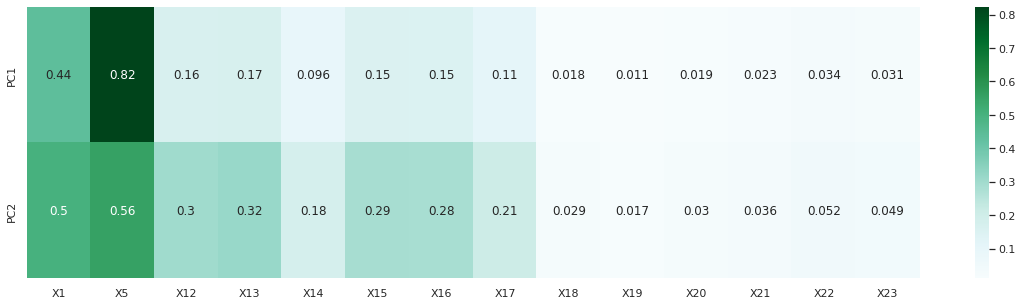

In [62]:
import seaborn as sns

correlation = df_components

sns.set(rc = {'figure.figsize': (20,5)})
sns.heatmap(correlation, annot = True, cmap = "BuGn")

**On both Principal Components the feature most important are X5 and X1**

In [63]:
X_new = pd.DataFrame(X_new,columns =('PC1','PC2') )
X_new

,PC1,PC2
0,-0.262126,-0.026826
1,-0.188326,0.006667
2,-0.076778,-0.064545
3,-0.036630,-0.085235
4,0.231464,-0.306664
...,...,...
29990,0.128237,0.094423
29991,0.067272,-0.139528
29992,-0.064110,-0.129992
29993,0.041315,-0.095424


In [64]:
dataframe = CategoricalColumns.merge(X_new, how='inner', left_index=True, right_index=True)
dataframe.head()

,X2,X3,X4,X6,X7,X8,X9,X10,X11,PC1,PC2
1,2.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,-0.188326,0.006667
2,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,-0.076778,-0.064545
3,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.036630,-0.085235
4,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231464,-0.306664
5,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.035772,-0.083739


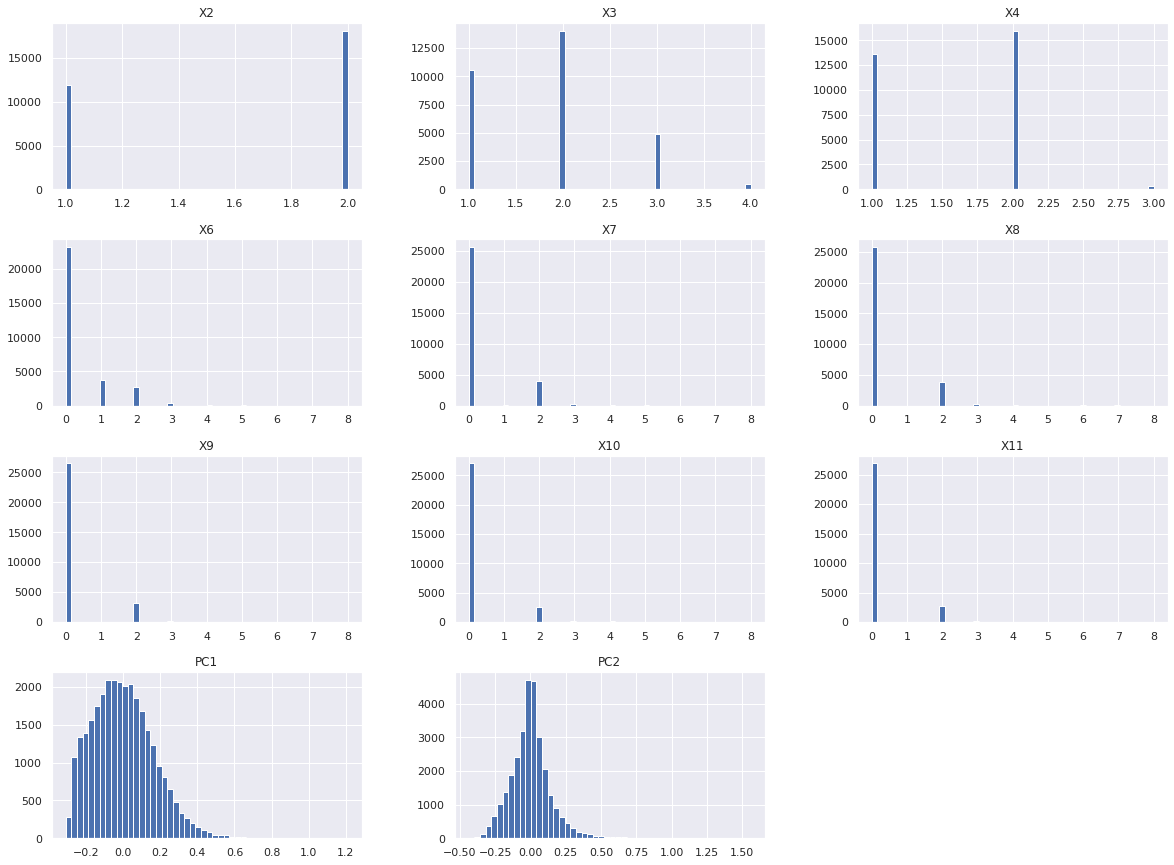

In [65]:
import matplotlib.pyplot as plt

dataframe.hist(bins = 50, figsize = (20,15))
plt.show()

Description of the histograms

#9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

['X2', 'X3', 'X4', 'PC1', 'PC2']
X2


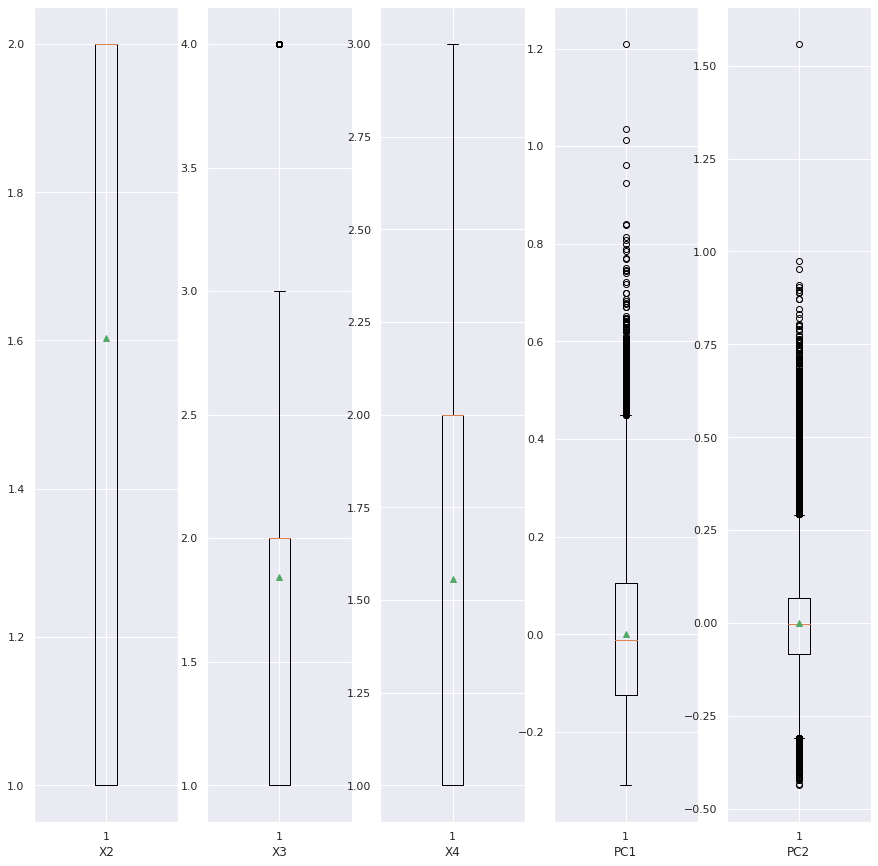

In [82]:
sns.set(rc={'figure.figsize':(15,15)})
nombres = ['X2','X3', 'X4','PC1', 'PC2']
print(nombres)
fig, axes = plt.subplots(2, 4)
k=0
print(nombres[0])
for name in nombres:
  plt.subplot(1,5,k+1) 
  plt.boxplot(dataframe[name], showmeans=True)
  plt.xlabel(name)
  k+=1

plt.show()

In [159]:
dataframe.X3.value_counts().sort_index(ascending = True)

1.0    10584
2.0    14023
3.0     4912
4.0      470
Name: X3, dtype: int64

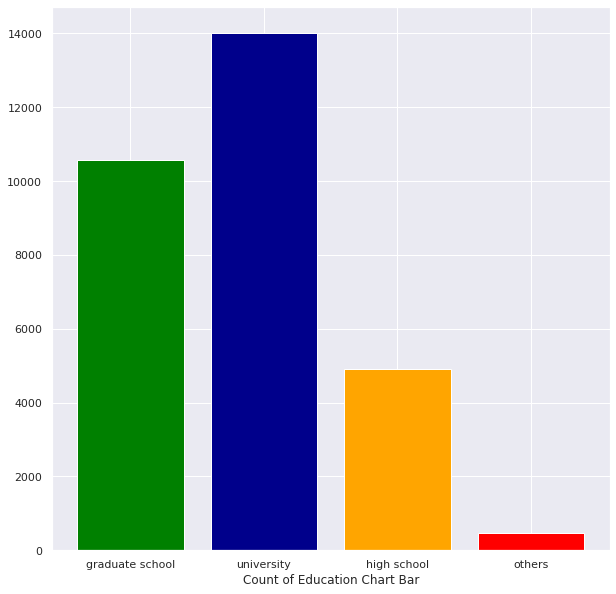

In [163]:
sns.set(rc={'figure.figsize':(10,10)})
Label = ["graduate school","university", "high school", "others"]
plt.xlabel('Count of Education Chart Bar')
plt.bar(Label, dataframe.X3.value_counts().sort_index(ascending = True),color = ['green','darkblue','orange', 'red'])

  
plt.show()

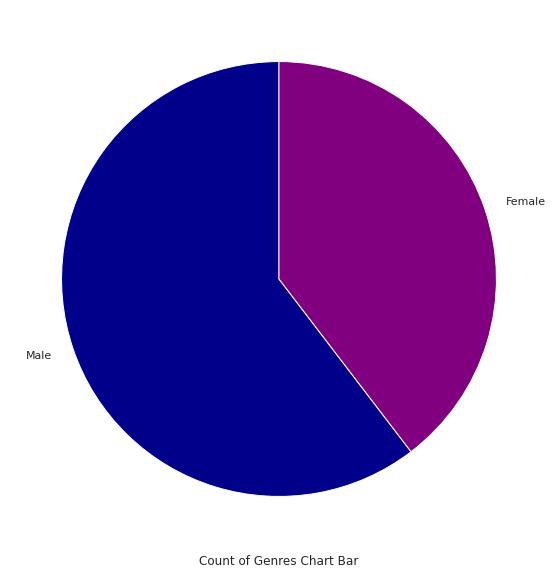

In [160]:

y = np.array(dataframe.X2.value_counts())
mylabels = ['Male', 'Female']
mycolors = ['darkblue','purple']

plt.pie(y, labels = mylabels, startangle = 90,colors = mycolors)
plt.xlabel('Count of Genres Pie Chart')
plt.show() 